In [1]:
import os
import pandas as pd
from deside.utility import ExpObj, set_fig_style
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
set_fig_style(font_family='Arial', font_size=8)

In [2]:
fig_dir = './sup_figures/'

In [3]:
gene_list_in_sc_ds = pd.read_csv('../datasets/single_cell/gene_list_in_merged_7_sc_datasets.csv')
print(gene_list_in_sc_ds.shape)
gene_list_in_sc_ds.head(2)

(12114, 2)


,gene_name,gene_ids
0,A1BG,ENSG00000121410
1,A2M,ENSG00000175899


In [7]:
exp_obj_ref = ExpObj(exp_file='../datasets/TCGA/tpm/merged_tpm.csv', exp_type='TPM')
exp_obj_ref.align_with_gene_list(gene_list=gene_list_in_sc_ds['gene_name'].to_list(), fill_not_exist=True)
exp_ref_df = exp_obj_ref.get_exp()
median_gep_ref = exp_ref_df.median(axis=0).values.reshape(1, -1)  # TPM
l1_distance_with_center_ref = np.linalg.norm(exp_ref_df - median_gep_ref,
                                             ord=1, axis=1)
q_dis_nn_ref = np.quantile(l1_distance_with_center_ref, 0.95)
q_dis_nn_ref

12114 common genes will be used, 7598 genes will be removed.


668987.093099999

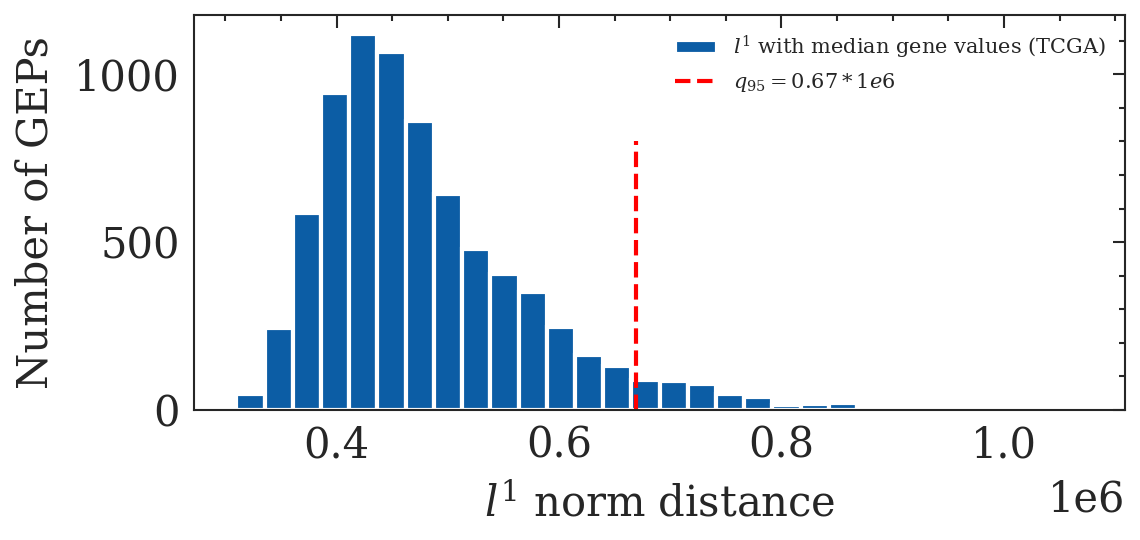

In [8]:
# sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 1, figsize=(4, 2))

ax.hist(l1_distance_with_center_ref, bins=30, label='$l^{1}$ with median gene values (TCGA)')
ax.vlines(q_dis_nn_ref, ymin=0, ymax=800, colors='red', linestyles='--', label='$q_{95}=0.67*1e6$')

ax.set_xlabel('$l^{1}$ norm distance')
ax.set_ylabel('Number of GEPs')
# ax.xaxis.set_label_coords(0.45, -0.2)
ax.legend(fontsize=5)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'l1_norm_with_median_gene_values_tcga3.png'))

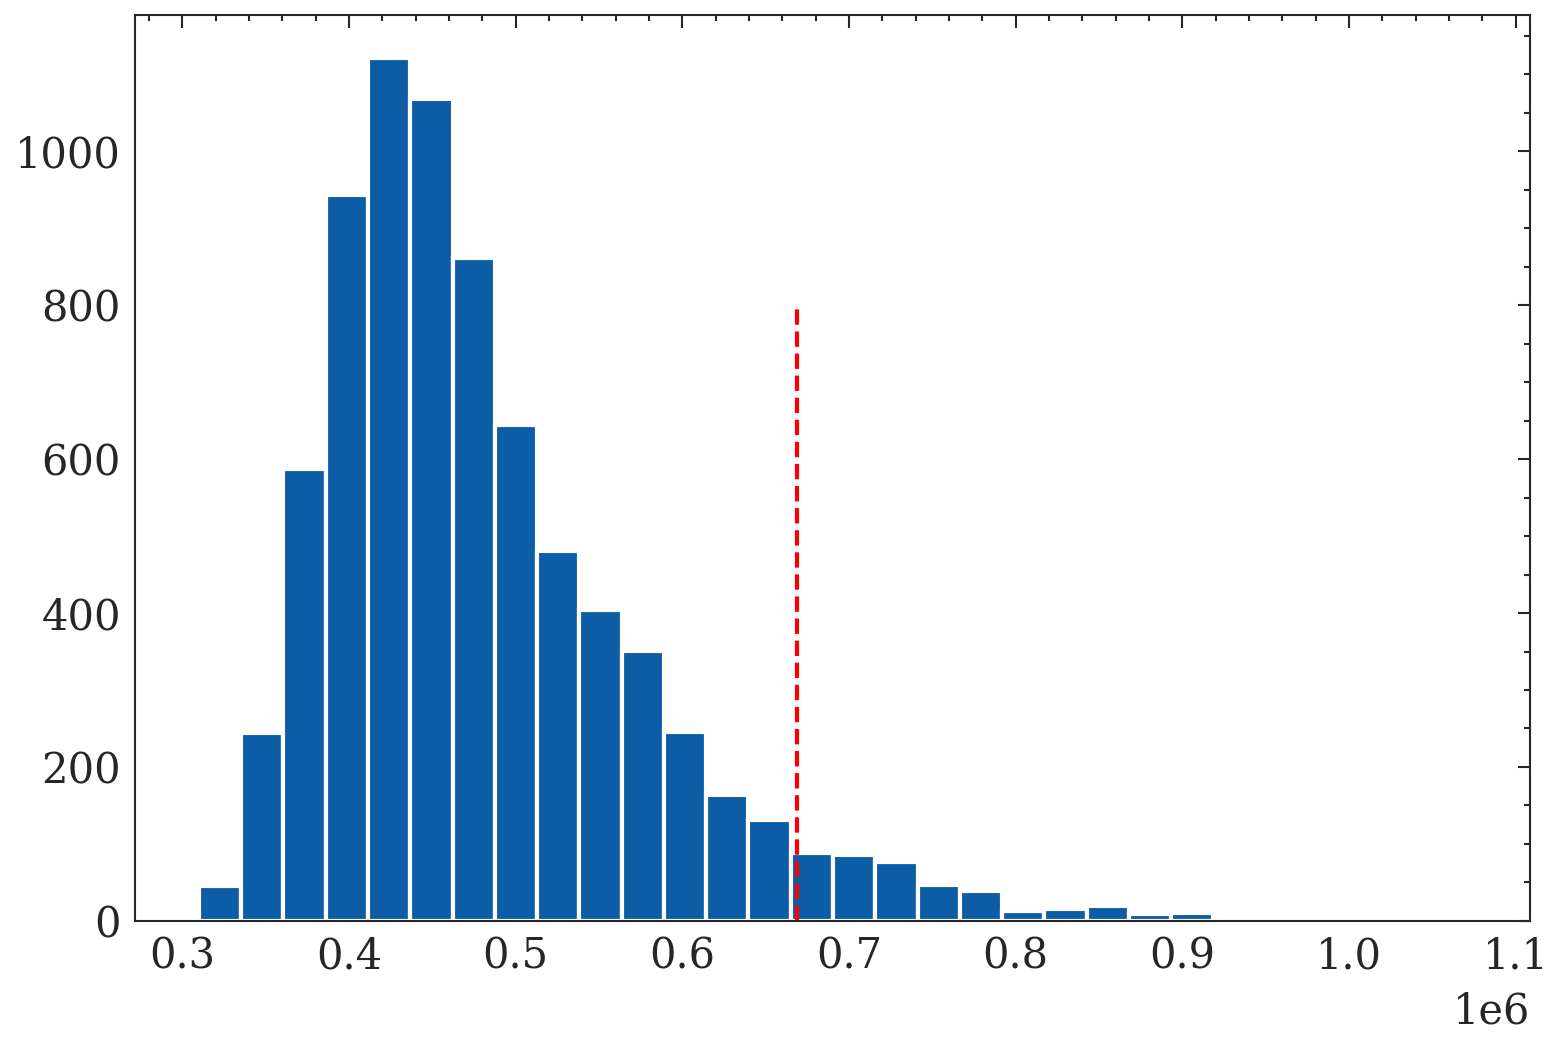

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(l1_distance_with_center_ref, bins=30)
plt.vlines(q_dis_nn_ref, ymin=0, ymax=800, colors='red', linestyles='--')

In [10]:
a = np.random.random((1, 11))
b = np.random.random((11, 10000))
%timeit a@b

16.6 µs ± 241 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%timeit np.matmul(a, b)

16.5 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
sns.set_style("white")

In [48]:
q_lower = 0.1
q_upper = 0.9
# mpl.rcParams['text.usetex'] = True
a = f'($q_{{{q_lower*100:.0f}}}-q_{{{q_upper*100:.0f}}}$)'
# a = r'\rom{23}'
print(a)
plt.plot(np.arange(0, 100), label=f'{a}')
plt.legend()

($q_{10}-q_{90}$)


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1050x787.5 with 1 Axes>